<a href="https://colab.research.google.com/github/Data-Analytics-with-Python/individual-assignment-i-Kaufmann11/blob/main/Assignment_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANT: Before you start, enter your name and student number below.

**Full Name:Karim Kaufmann

**Student Number:**400677758

# Exploring Customer Data with Pandas

Use the provided Nata Supermarkets dataset to answer the following questions.
Your goal is to use Pandas operations to explore, clean, and summarize the data, and to draw a few simple insights about customer demographics and behavior.

Please complete all task requested and answer all questions explicitly and support your answers with Python codes. Insert code and text cells as you need.

## 1. Inspecting and loading the Data (10pts)

* Save the dataset in the case supplementary file (in Excel) as a csv file.

* Load the dataset as a pandas data frame and display the first few rows. (Note: you may upload it to your Colab storage space and load it from there.)

    * How many features (columns) and records (rows) are in the dataset?

In [17]:
import pandas as pd


df = pd.read_csv('/O712Assignment1.csv', sep=';')


print("First Rows of Dataset:")
display(df.head())


num_rows, num_cols = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

First Rows of Dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,09.04.12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,03.08.14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,02.10.14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0



Number of rows: 2240
Number of columns: 29


## 2. Data Cleaning and Missing Values (14pts)

* Check for missing values across all columns.

* Which columns contain missing data, and how many missing entries are there?

* What strategies could you use to handle them (drop, fill, or ignore)? Apply one reasonable approach and explain your choice.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [18]:
# Check for missing values
print("Missing values across columns:")
print(df.isnull().sum())

# columns with missing data and how many missing entries
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print("\nColumns with missing data and count of missing entries:")
print(missing_columns)

# missing values
df_cleaned = df.dropna()

print(f"\nNumber of rows after removing missing values: {df_cleaned.shape[0]}")

Missing values across columns:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Columns with missing data and count of missing entries:
Income    24
dtype: int64

Number of rows after removing missing values: 2216


## 3. Removing Constant Columns (14pts)

* Identify any columns with constant values (no variance; all rows have the same value).

* Drop them from your DataFrame and confirm how many columns remain.

In [19]:
# columns with constant values
constant_columns = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 1]

print(f"Columns with constant values: {constant_columns}")


df_cleaned = df_cleaned.drop(columns=constant_columns)


print(f"Number of columns remaining: {df_cleaned.shape[1]}")

Columns with constant values: ['Z_CostContact', 'Z_Revenue']
Number of columns remaining: 27


## 4. Add a new column (15pts)

* Add a new column **Customer_Days** to store the total number of days each customer has been with the company. You may follow the steps below:
  * use `pd.to_datetime(df["Dt_Customer"])` to convert the string variable to a *date-time* variable

  * use `today = datetime.today()` to find the date of today

  * use `(today - df["Dt_Customer"]).dt.days` to find the difference between today and the onbard date.

In [20]:
from datetime import datetime

# Converting 'Dt_Customer'
df_cleaned["Dt_Customer"] = pd.to_datetime(df_cleaned["Dt_Customer"], dayfirst=True)

today = datetime.today()

df_cleaned["Customer_Days"] = (today - df_cleaned["Dt_Customer"]).dt.days

# Display Dataframe
print("DataFrame with 'Customer_Days' column:")
display(df_cleaned.head())

DataFrame with 'Customer_Days' column:


/tmp/ipython-input-1136268120.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned["Dt_Customer"] = pd.to_datetime(df_cleaned["Dt_Customer"], dayfirst=True)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,4,7,0,0,0,0,0,0,1,4943
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,2,5,0,0,0,0,0,0,0,4097
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,4444
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,4,6,0,0,0,0,0,0,0,4037
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,4293


## 5. Categorical Features (15 pts)

* For `Education` and `Marital_Status`,

  * find how many customers fall into each category
  * create pie charts to show the percentage of each category; make sure to show the percentage numbers on the chart with 2 decimal places

* What do you findings suggest about the company's target demographic?

Customer counts by Education:
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


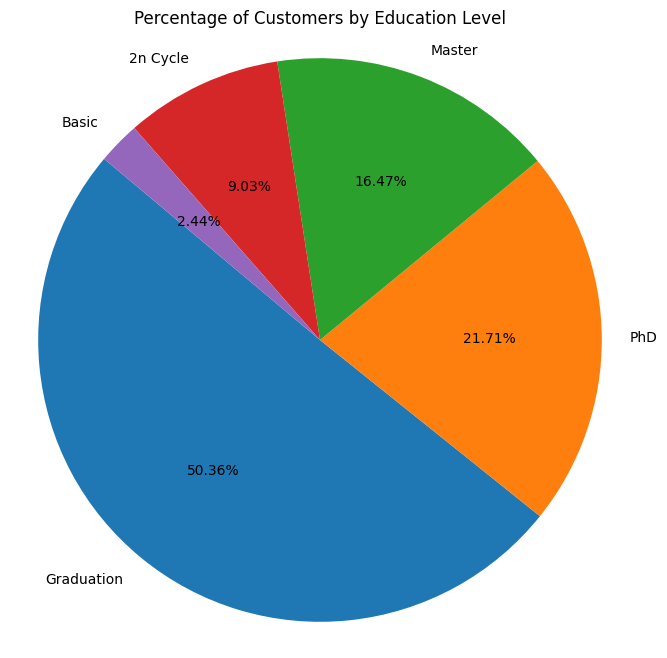


Customer counts by Marital Status:
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


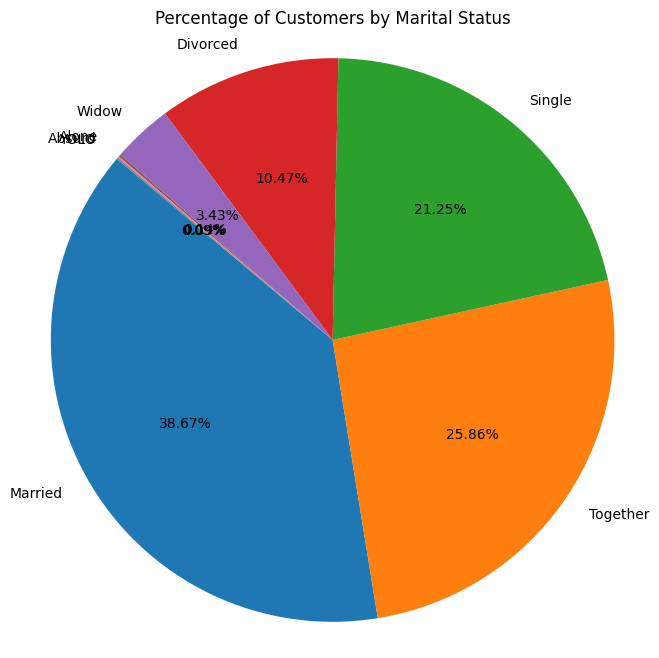

In [12]:
import matplotlib.pyplot as plt

# 'Education'
education_counts = df_cleaned['Education'].value_counts()
print("Customer counts by Education:")
print(education_counts)

plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Percentage of Customers by Education Level')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 'Marital_Status'
marital_counts = df_cleaned['Marital_Status'].value_counts()
print("\nCustomer counts by Marital Status:")
print(marital_counts)

plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Percentage of Customers by Marital Status')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## 6. Numeric Variables (15pts)

* For `Income`, `Kidhome`, and `Teenhome`,
  * use boxplots to visualize their distributions.

* Based on these distributions, what can you say about the typical household profile of Nata's customers?

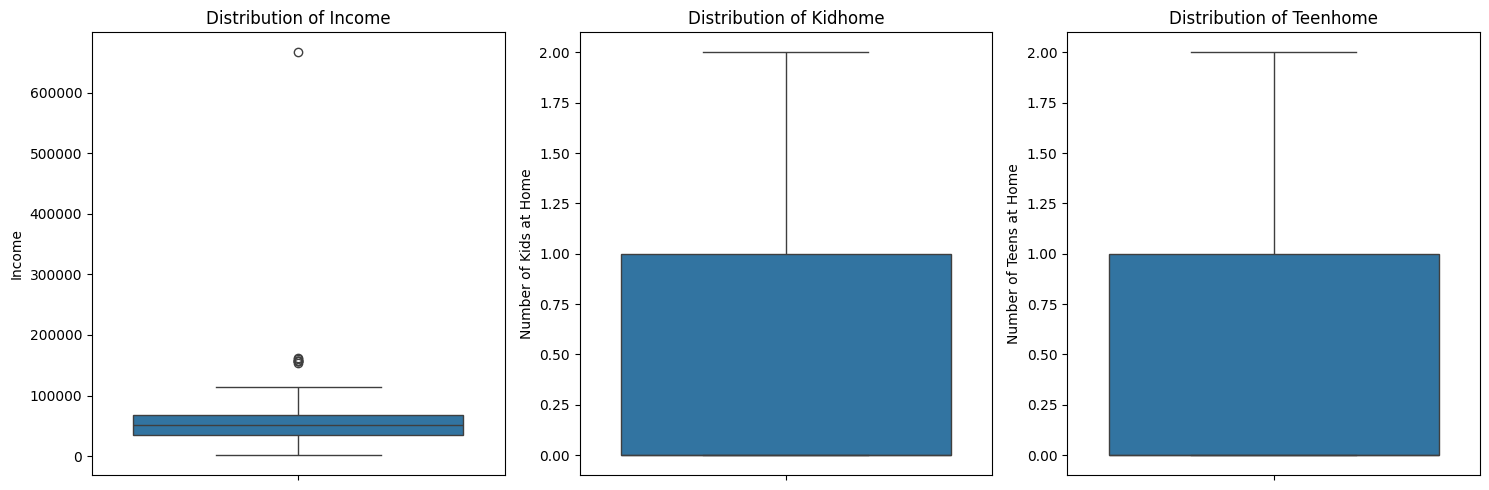

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

#boxplots for Income, Kidhome, and Teenhome
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df_cleaned['Income'])
plt.title('Distribution of Income')
plt.ylabel('Income')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_cleaned['Kidhome'])
plt.title('Distribution of Kidhome')
plt.ylabel('Number of Kids at Home')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_cleaned['Teenhome'])
plt.title('Distribution of Teenhome')
plt.ylabel('Number of Teens at Home')

plt.tight_layout()
plt.show()

## 7. Spending by Products (15pts)

* Examine the spending amount columns `MntWines`,	`MntFruits`,	`MntMeatProducts`,	`MntFishProducts`,	`MntSweetProducts`,	`MntGoldProds`, and find the product with the highest total spending amount by all customers.



In [22]:
# spending columns
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


total_spending = df_cleaned[spending_columns].sum()

highest_spending_product = total_spending.idxmax()
highest_spending_amount = total_spending.max()

print("Total spending by product category:")
print(total_spending)

print(f"\nProduct with the highest total spending: {highest_spending_product}")
print(f"Highest total spending amount by all customers: {highest_spending_amount:.2f}")

Total spending by product category:
MntWines            676083
MntFruits            58405
MntMeatProducts     370063
MntFishProducts      83405
MntSweetProducts     59896
MntGoldProds         97427
dtype: int64

Product with the highest total spending: MntWines
Highest total spending amount by all customers: 676083.00


## 8. Use of Gen. AI (2pts)

Use of Generative AI is allowed. Briefly describe if and how you have used Gen. AI tools in this assignment.

for the plotting bit AI was used more heavily